` IMPORTING LIBRARIES `

In [71]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import re

from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

` LOADING DATA `

In [72]:
data = pd.read_csv("C:\\Users\\HP\\Desktop\\imdb\\IMDB.csv")

` INSIGHT INTO DATA `

In [73]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [74]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [75]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [77]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [78]:
# no missing value in any column or row is there

` VISUALISATION `

In [79]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

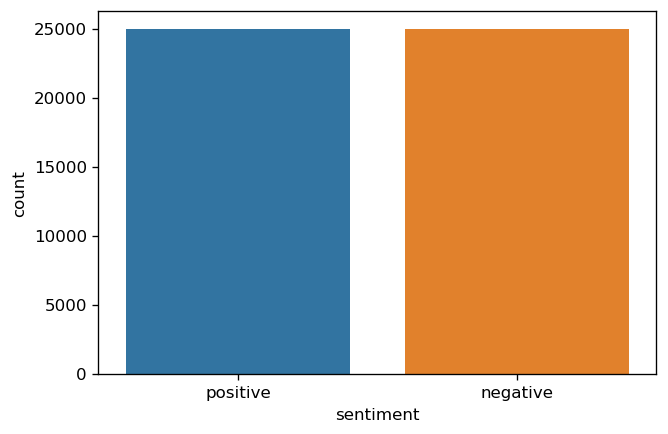

In [80]:
plt.figure(dpi=120)
sns.countplot('sentiment',data=data)
plt.show()

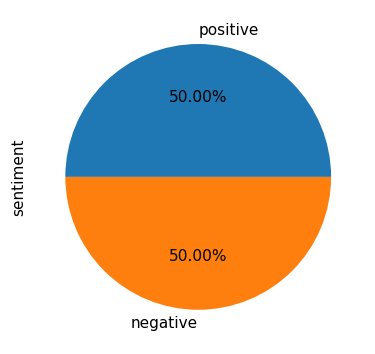

In [81]:
plt.figure(dpi=110)
((data['sentiment'].value_counts() / data.shape[0])*100).plot(kind='pie', autopct="%0.2f%%")
plt.show()

In [82]:
# its clear from seeing the visuals that data is balanced,there wont be any problem of data imbalanace

` WordCloud to visualise common words in positive and negative sentiment `

In [83]:
from wordcloud import WordCloud
def plot_img(img):
    plt.figure(dpi=200)
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

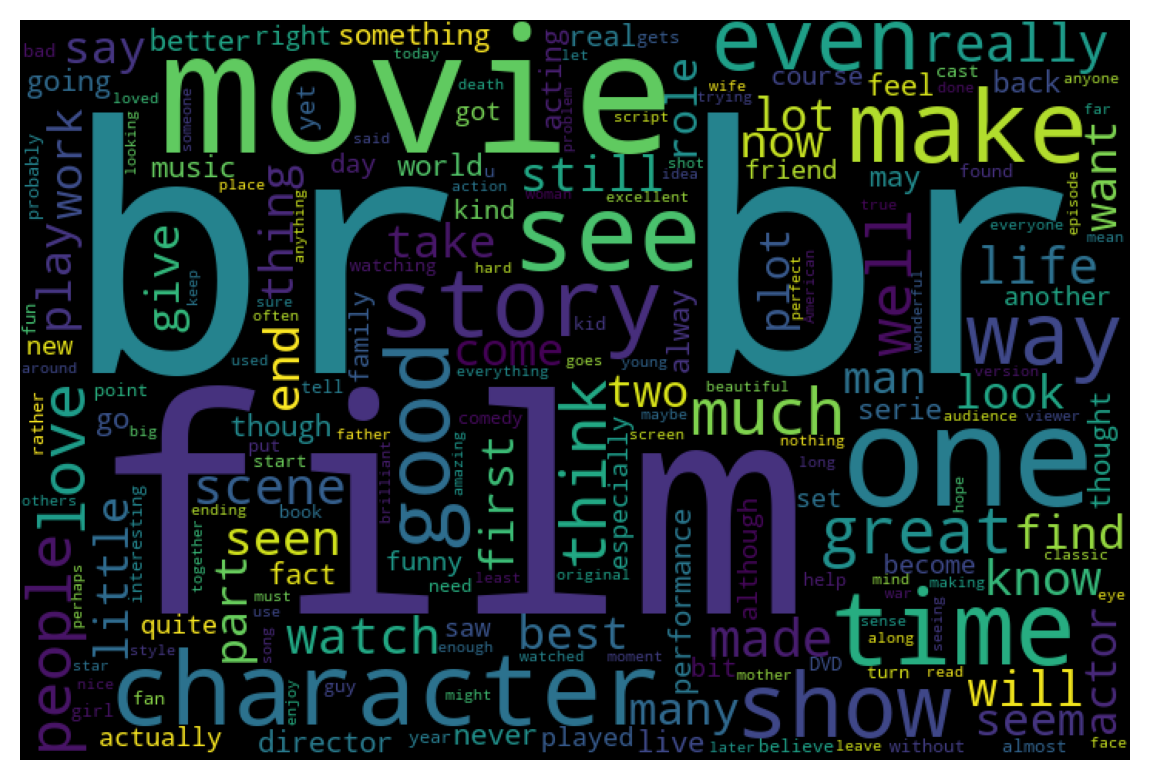

In [84]:
positive_sentiment = " ".join(data[data['sentiment'] == 'positive']['review'])

positive_wordcloud = WordCloud(width=720, height=480).generate(positive_sentiment)
plot_img(positive_wordcloud)
#positive_sentiment

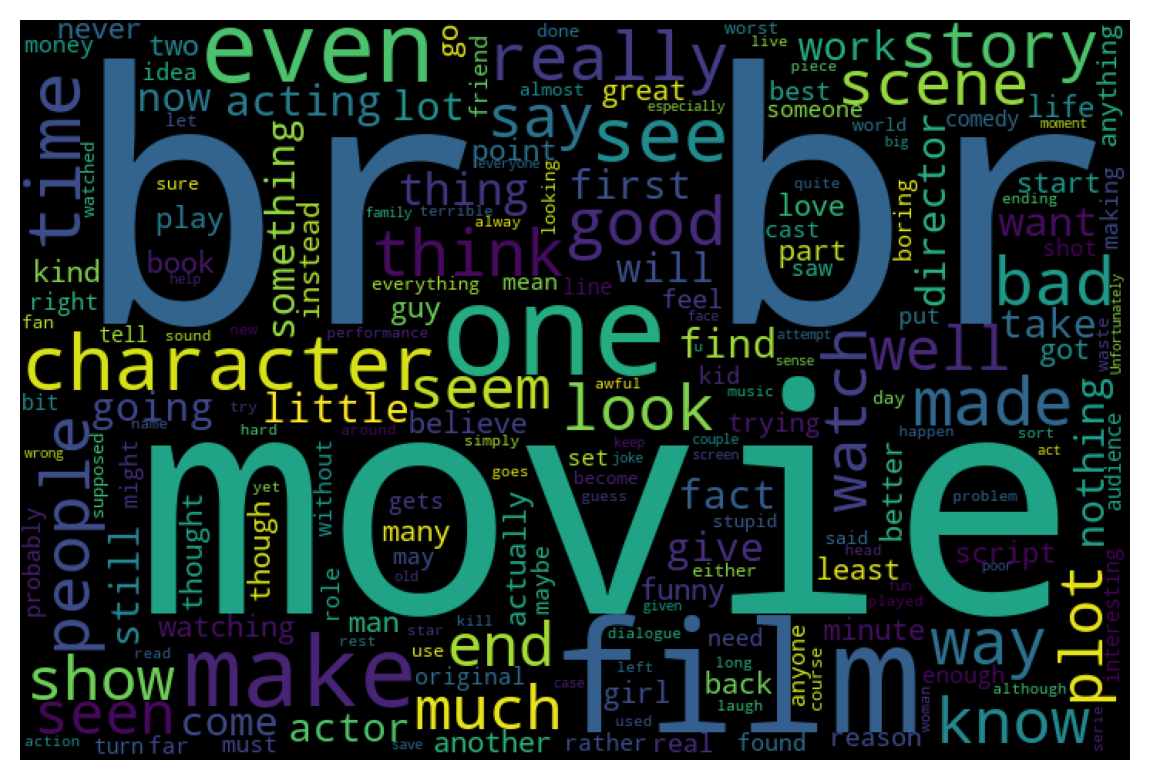

In [85]:
negative_sentiment = " ".join(data[data['sentiment'] == 'negative']['review'])

negative_wordcloud = WordCloud(width=720, height=480).generate(negative_sentiment)
plot_img(negative_wordcloud)
#negative_sentiment

In [86]:
# there are 50000 review given out of which sampling is done.

In [87]:
data = data.sample(10000)

In [88]:
data.head()

,review,sentiment
28380,I didn't know what to expect when I started wa...,negative
34866,"I've now seen this one about 10 times, so ther...",positive
47458,I have to admit that I'm a great fan of this s...,negative
28141,"A fierce, shockingly intelligent piece of work...",positive
49057,I know a lot of people have said don't bother ...,positive


In [89]:
data.shape

(10000, 2)

In [90]:
data['sentiment'].replace({'positive': 1, 'negative': 0},inplace=True)

In [91]:
data.head()

,review,sentiment
28380,I didn't know what to expect when I started wa...,0
34866,"I've now seen this one about 10 times, so ther...",1
47458,I have to admit that I'm a great fan of this s...,0
28141,"A fierce, shockingly intelligent piece of work...",1
49057,I know a lot of people have said don't bother ...,1


In [92]:
# 0 ---> NEGATIVE , 1---> POSITIVE

` NLP / NATURAL LANGUAGE PROCESSING `

In [93]:
def process_string(review):
    ps = PorterStemmer()
    review = review.lower()
    expr = re.compile(r'[^0-9A-Za-z]')
    review = re.sub(expr,' ',review)
    review = re.sub(r"\s+", ' ',review)
    review = re.sub(r"br", ' ',review)
    stopwords = nltk.corpus.stopwords.words('english') 
    review = " ".join([ ps.stem(word) for word in review.split() if word not in stopwords])
    return review

In [94]:
data['review'] = data['review'].apply(process_string)

In [95]:
data.head()

,review,sentiment
28380,know expect start watch movi end pull hair one...,0
34866,seen one 10 time must someth like 50 us sci fi...,1
47458,admit great fan show must know disappoint got ...,0
28141,fierc shockingli intellig piec work gift itish...,1
49057,know lot peopl said bother movi good fight fli...,1


` CONVERTING TEXT INTO VECTOR `

In [96]:
data.head()

,review,sentiment
28380,know expect start watch movi end pull hair one...,0
34866,seen one 10 time must someth like 50 us sci fi...,1
47458,admit great fan show must know disappoint got ...,0
28141,fierc shockingli intellig piec work gift itish...,1
49057,know lot peopl said bother movi good fight fli...,1


In [97]:
# vocablary out of corpus

In [98]:
X = data[['review']]

In [99]:
y = data['sentiment']

In [100]:
vector = CountVectorizer()

In [101]:
X_tr = vector.fit_transform(X['review'])

In [102]:
X_tr.shape

(10000, 35414)

In [103]:
# out of 10000 rows that we have sampled there are 35600 unique word in the corpus which will form vocabulary

` Training Model `

In [104]:
X_train , X_test , y_train , y_test = train_test_split(X_tr,y)

In [105]:
X_train.shape

(7500, 35414)

In [106]:
svm_clf = SVC()

In [107]:
svm_clf.fit(X_train,y_train)

SVC()

In [108]:
actual1 = y_test

In [109]:
predicted1 = svm_clf.predict(X_test)

In [110]:
print(confusion_matrix(actual1,predicted1))

[[1000  261]
 [ 140 1099]]


In [111]:
# 1000 are true negative, 244 are false positive, 150 false negatuve, 1099 are true positive

In [112]:
print(classification_report(actual1,predicted1))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1261
           1       0.81      0.89      0.85      1239

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500



In [113]:
from sklearn.metrics import accuracy_score

In [114]:
print(accuracy_score(actual1,predicted1)*100)

83.96000000000001


In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
lr = LogisticRegression()

In [117]:
lr.fit(X_train,y_train)

LogisticRegression()

In [118]:
actual2 = y_test

In [119]:
predicted2 = lr.predict(X_test)

In [120]:
print(confusion_matrix(actual2,predicted2))

[[1057  204]
 [ 163 1076]]


In [121]:
print(accuracy_score(actual2,predicted2)*100)

85.32


In [122]:
from sklearn.linear_model import SGDClassifier

In [123]:
sgd = SGDClassifier()

In [124]:
sgd.fit(X_train,y_train)

SGDClassifier()

In [125]:
actal3 = y_test

In [126]:
predicted3 = sgd.predict(X_test)

In [127]:
print(confusion_matrix(actal3,predicted3))

[[1054  207]
 [ 197 1042]]


In [128]:
print(accuracy_score(actal3,predicted3)*100)

83.84


In [129]:
print(classification_report(actual1,predicted1))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1261
           1       0.81      0.89      0.85      1239

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500

